Импорт требуемых библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Модели регрессии и классификации
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

import numpy as np

# Классификация

Возьмём набор данных https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators
  
## 1 часть  
### 1. Скачать один из наборов данных
### 2. Загрузить данные в датафрейм
### 3. Вывести статистическую информацию о наборе данных
### 4. Вывести названия столбцов и строк
### 5. Заменить категориальные данные количественными

In [4]:
def load_data(file_path):
    """Загрузка набора данных из файла."""
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        return pd.read_excel(file_path)
    elif file_path.endswith('.json'):
        return pd.read_json(file_path)
    elif file_path.endswith('.parquet'):
        return pd.read_parquet(file_path)
    else:
        raise ValueError("Неподдерживамый формат. Укажите CSV, Excel, JSON или Parquet файл.")

def data_statistics(df, statistic = 'count'):
    """Отображение базовой статистики данных и построение распределений всех признаков на одном графике."""

    # Отображаем базовую статистику
    display(df.describe())

    # Выводим первые строки датафрейма
    print("Верхние строки:")
    display(df.head())

def convert_categorical(df):
    """Преобразование категориальных данных в числовые."""
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df, label_encoders


file_path = 'diabetes_health_indicators.xlsx'
df = load_data(file_path)
data_statistics(df)
df, label_encoders = convert_categorical(df)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Верхние строки:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### 6. Визуализировать данные с помощью Matplotlib и Seaborn
#### 1. Должно быть не менее 2х визуализаций на каждый признак

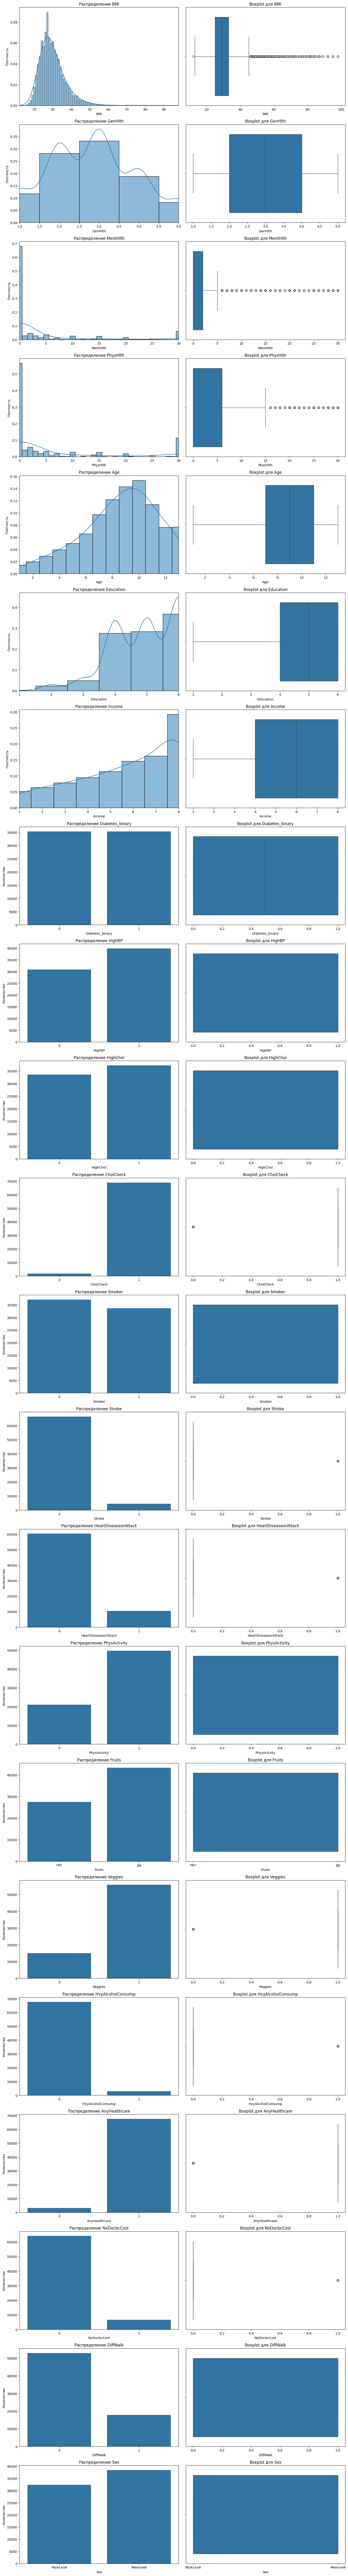

In [ ]:
def visualize_data(df):
    """Визуализация данных."""
        # Получаем числовые и категориальные признаки
    numeric_columns = df.select_dtypes(include=['float64']).columns
    categorical_columns = df.select_dtypes(include=['object', 'bool', 'int64']).columns

    # Количество графиков
    cols = 2  # Количество столбцов в сетке графиков
    rows = len(numeric_columns) + len(categorical_columns)  # Количество строк

    # Создаем субплоты
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
    axes = axes.flatten()

    # Визуализация числовых признаков
    for i, column in enumerate(numeric_columns):
        # Гистограмма
        sns.histplot(df[column],
                     kde=True,
                     kde_kws={'bw_adjust': 3, 'cut': 0},  # Настройка ширины ядра и границ KDE
                     stat='density',
                     bins=int(np.sqrt(len(df[column]))),  # Оптимальное количество бинов
                     discrete=True,
                     ax=axes[2*i])  # Гистограмма в первом столбце
        axes[2*i].set_title(f'Распределение {column}')
        axes[2*i].set_xlabel(column)
        axes[2*i].set_ylabel('Плотность')
        axes[2*i].set_xlim(df[column].min(), df[column].max())

        # Boxplot
        sns.boxplot(x=df[column], ax=axes[2*i+1], orient='h')  # Boxplot во втором столбце
        axes[2*i+1].set_title(f'Boxplot для {column}')

    # Визуализация категориальных признаков
    for i, column in enumerate(categorical_columns, len(numeric_columns)):
        # Гистограмма (countplot для категориальных данных)
        sns.countplot(x=df[column], ax=axes[2*i])
        axes[2*i].set_title(f'Распределение {column}')
        axes[2*i].set_xlabel(column)
        axes[2*i].set_ylabel('Количество')

        # Boxplot
        sns.boxplot(x=df[column], ax=axes[2*i + 1], orient='h')
        axes[2*i + 1].set_title(f'Boxplot для {column}')

    plt.tight_layout()
    plt.show()

visualize_data(df)

#### 2. Должно быть не менее 3х групповых визуализаций

Зависимости всех признаков друг от друга:


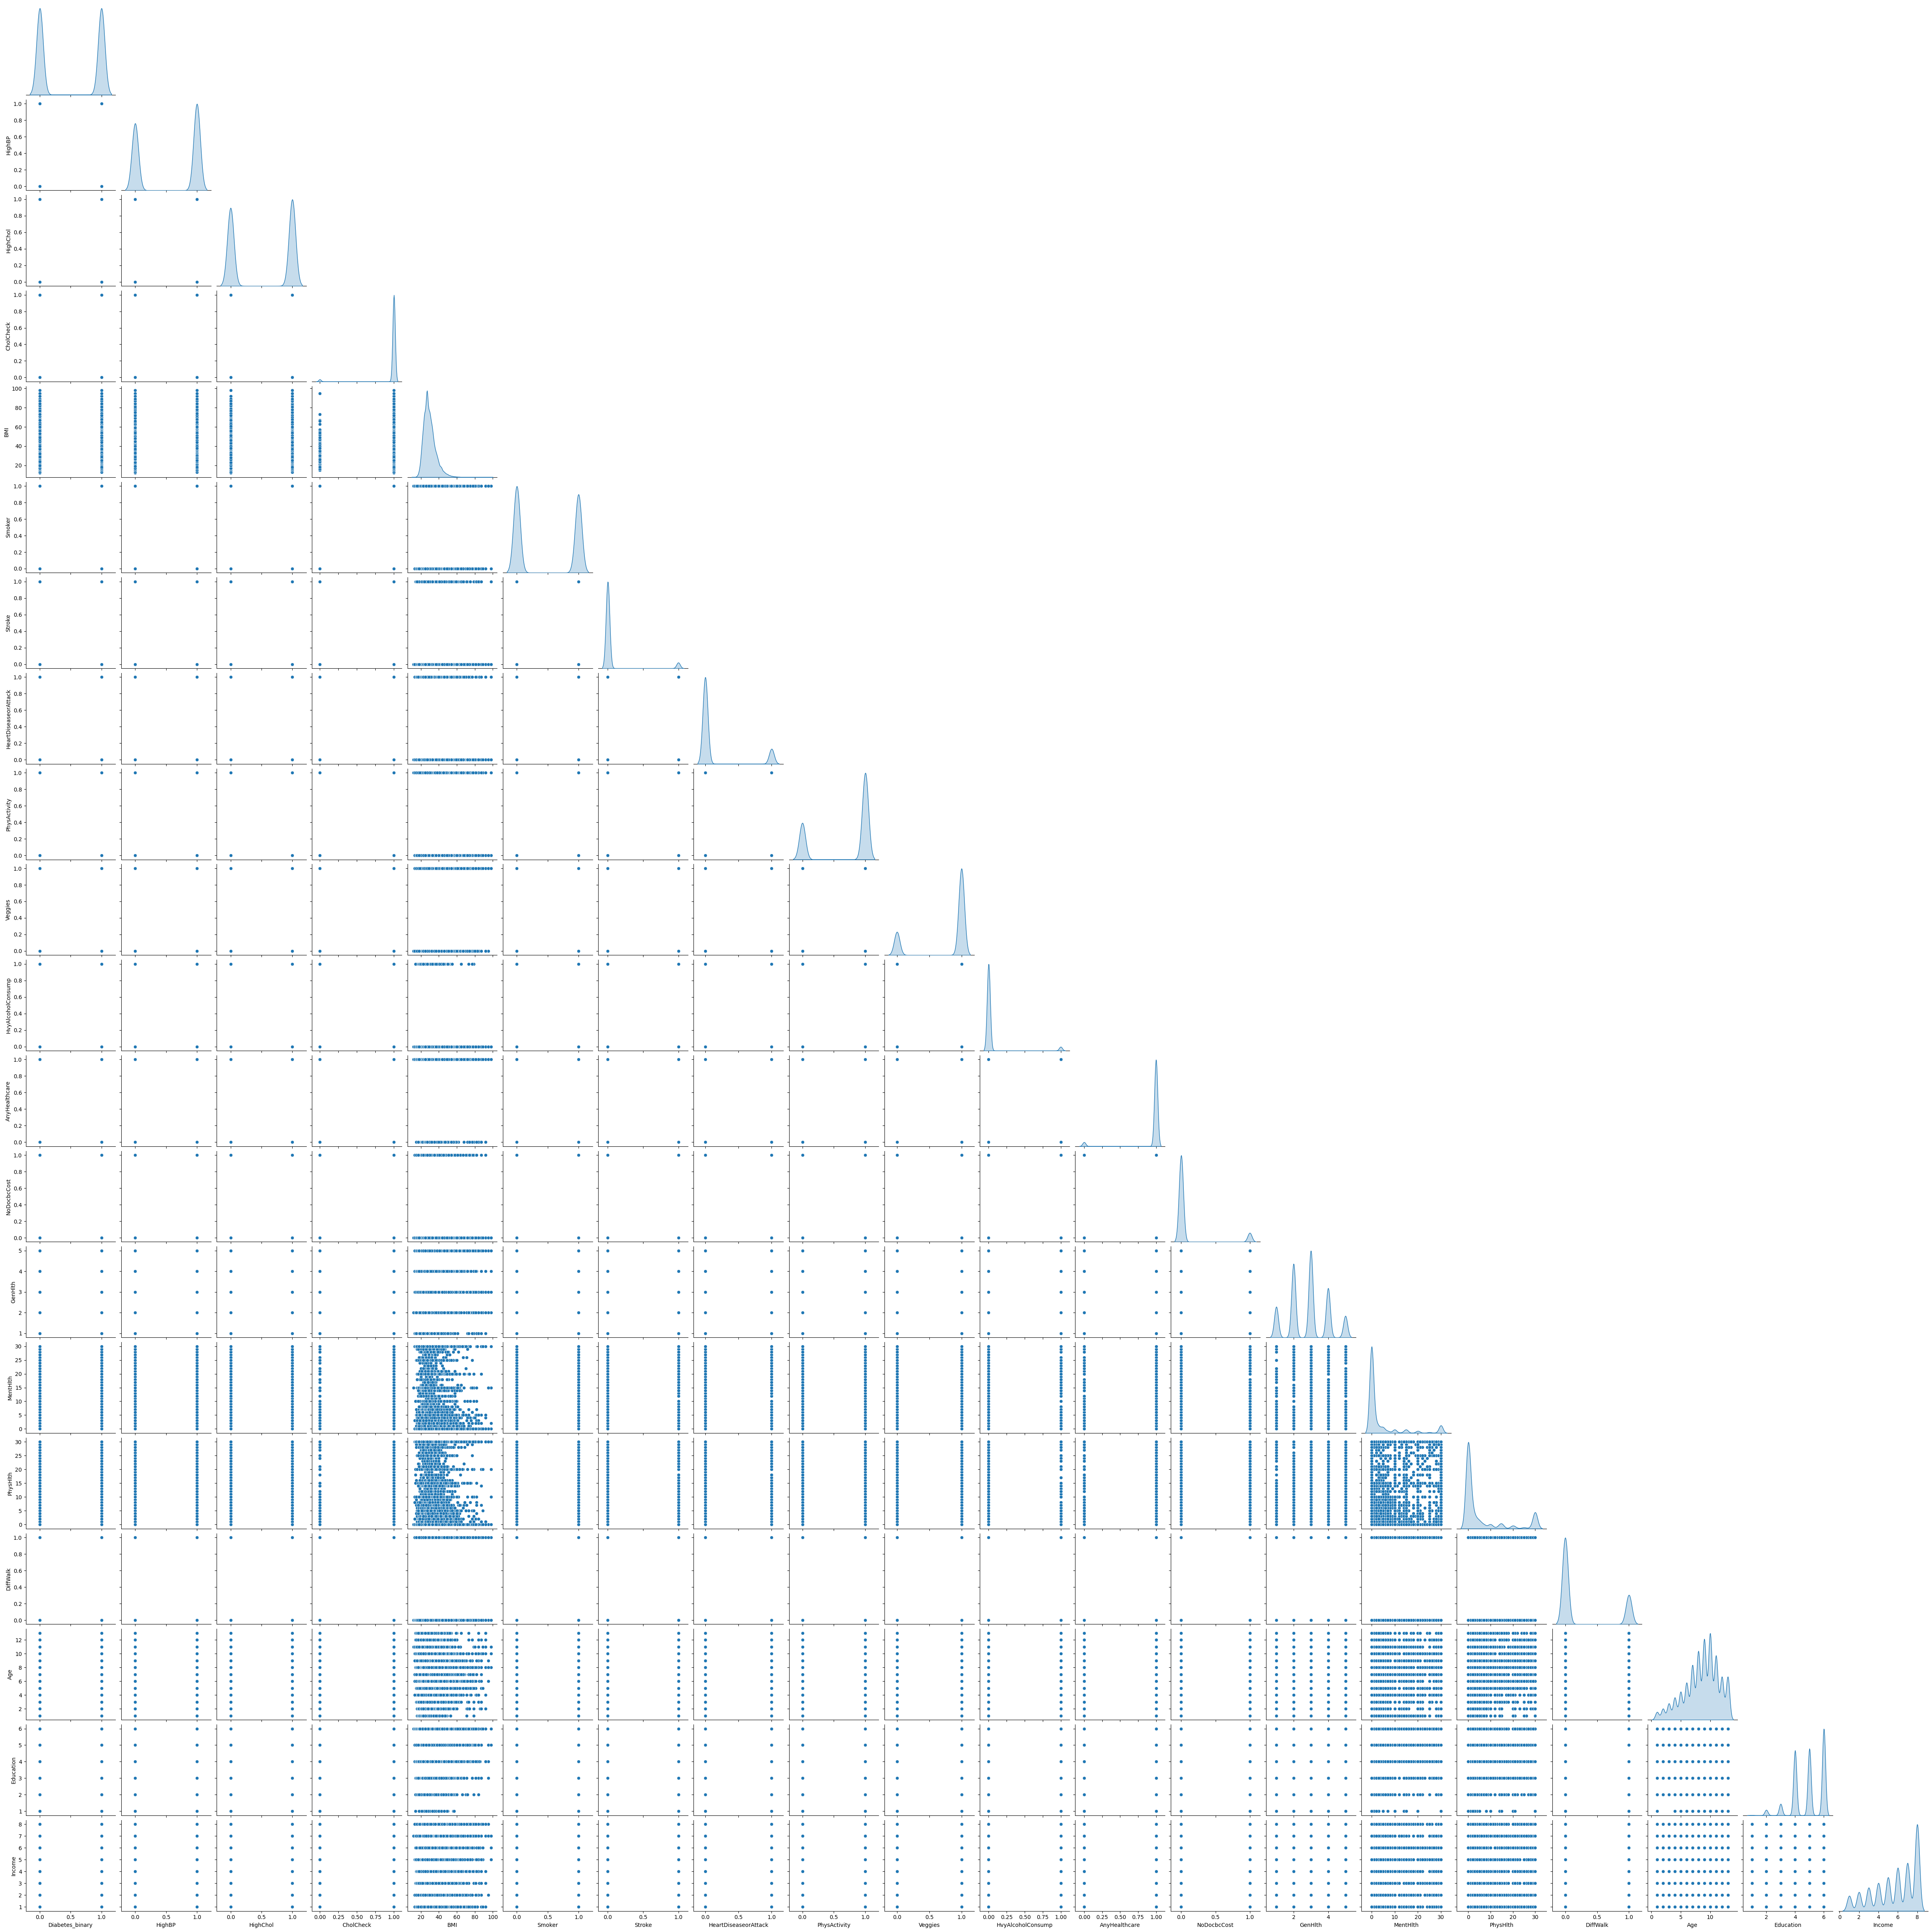

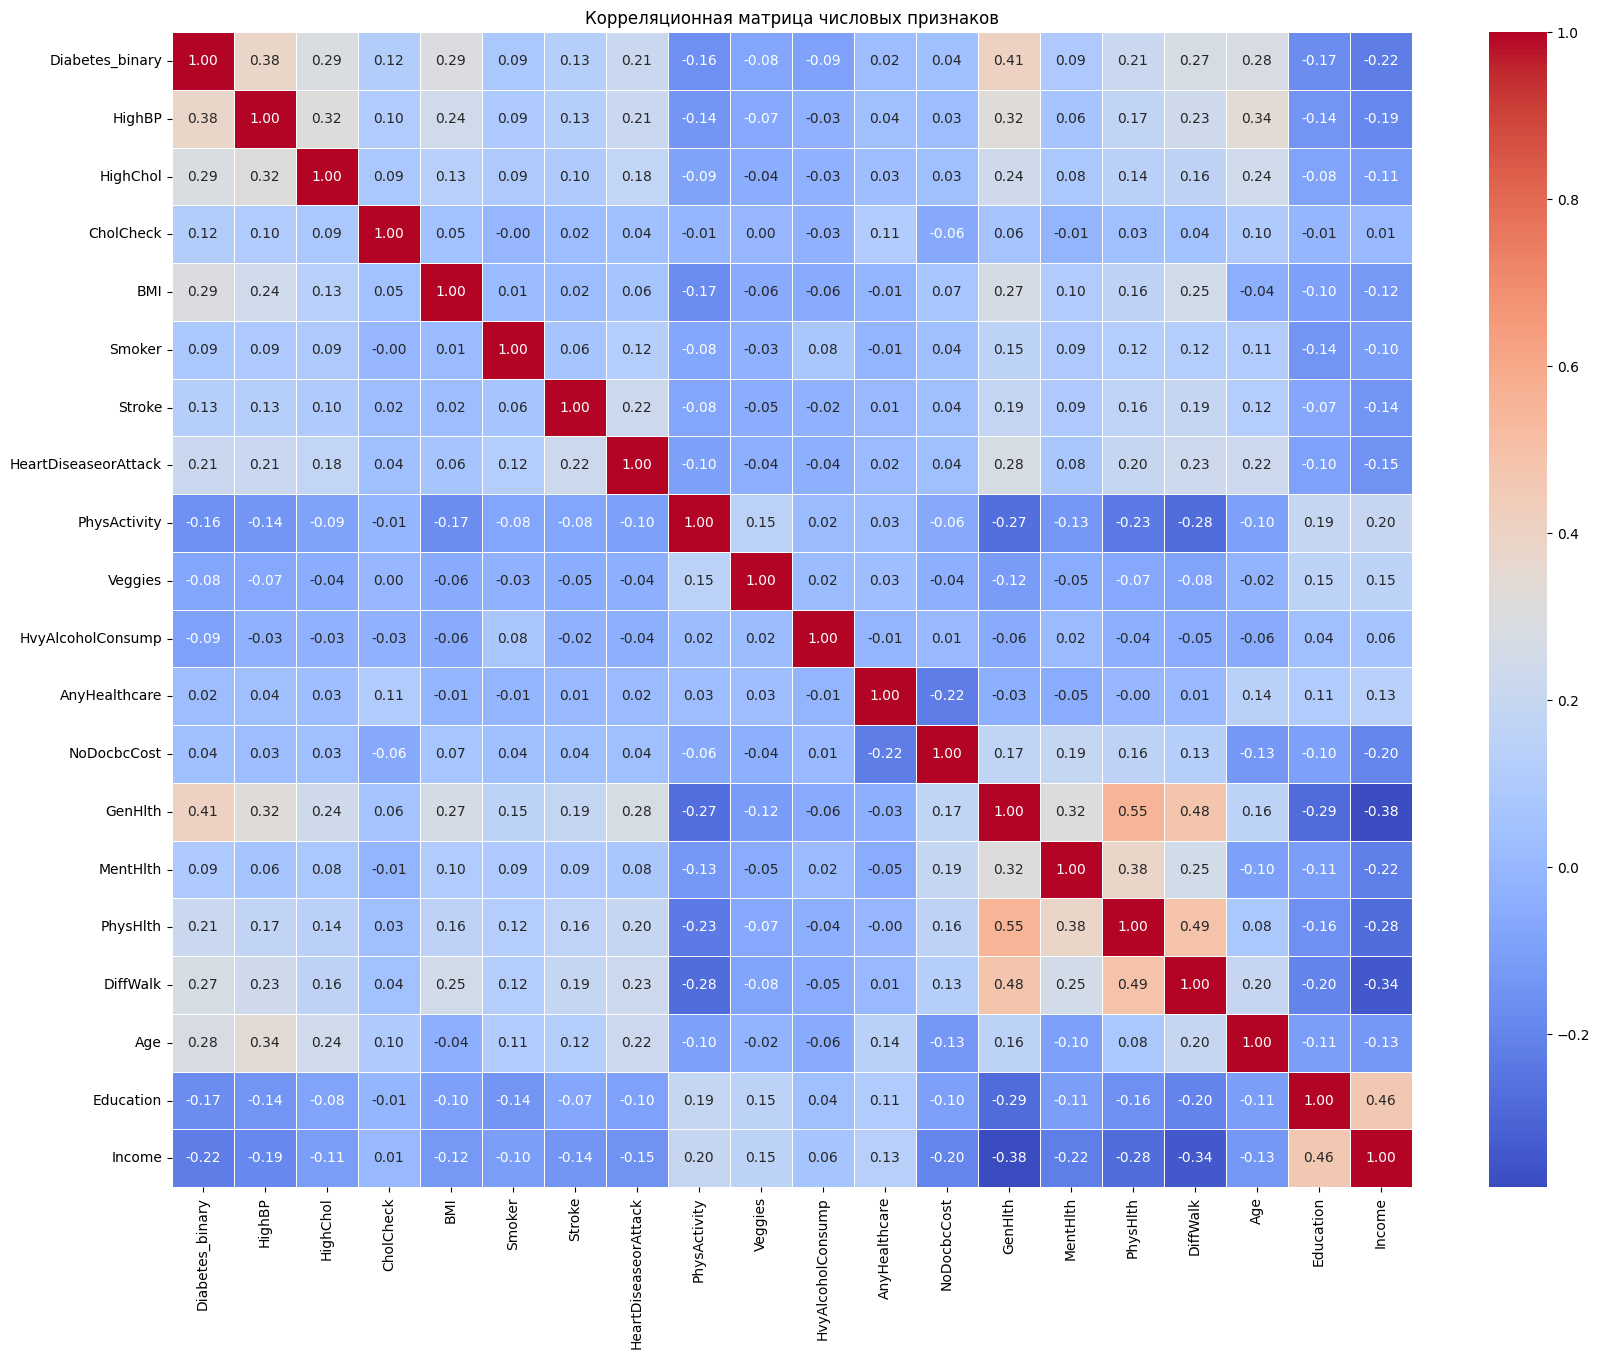

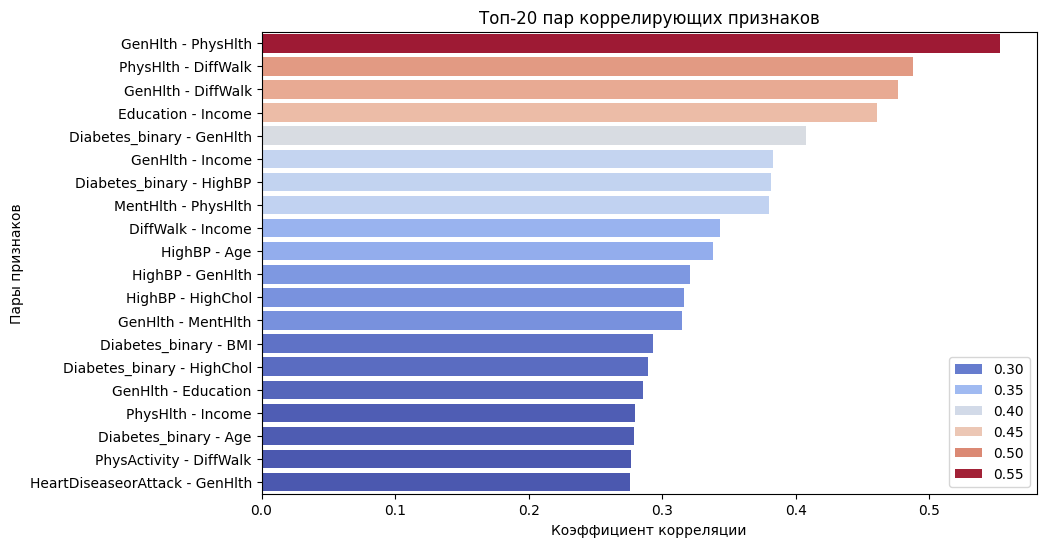

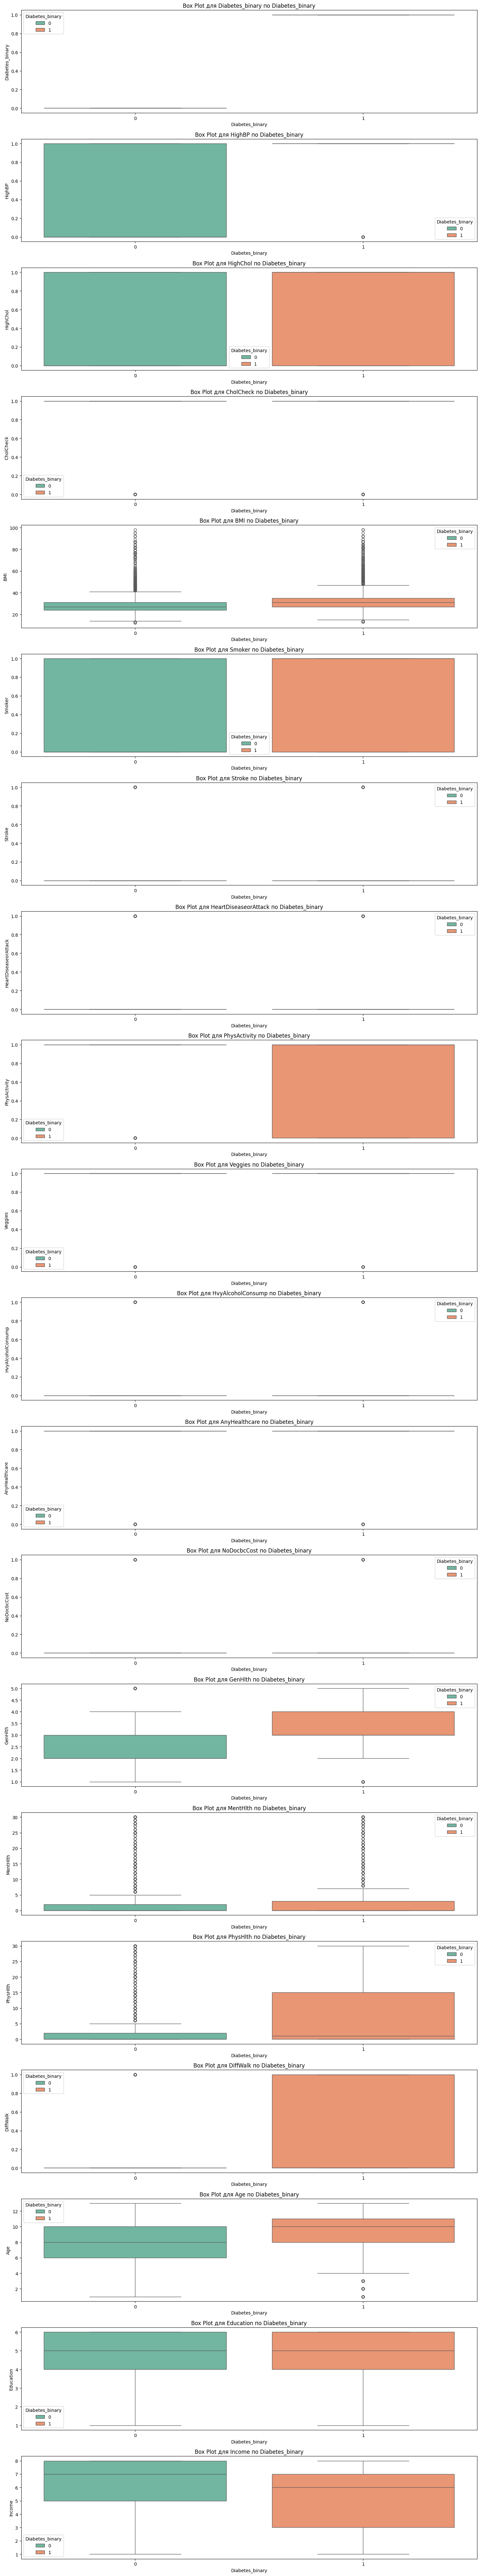

In [ ]:
def visualize_data_groups(df,way=0):
    """Групповая визуализация данных: pairplot, heatmap и FacetGrid."""

    # Получаем числовые и категориальные признаки
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

    # Pairplot для всех признаков
    print('Зависимости всех признаков друг от друга:')
    sns.pairplot(df, diag_kind='kde', corner=True)  # corner=True убирает зеркальные дубликаты
    plt.show()

    # Увеличиваем размер графика для heatmap
    plt.figure(figsize=(20, 15))
    sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Корреляционная матрица числовых признаков')
    plt.show()

    # Вычисление корреляций
    corr_matrix = df[numeric_columns].corr().abs()

    # Выбираем верхний треугольник корреляционной матрицы (чтобы избежать дубликатов)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    corr_matrix = corr_matrix.mask(mask)

    # Превращаем корреляционную матрицу в серию и сортируем по убыванию
    corr_pairs = corr_matrix.unstack().dropna().sort_values(ascending=False)

    # Выводим топ-N пар с наибольшей корреляцией
    top_n = 20  # Число выводимых пар
    top_corr_pairs = corr_pairs.head(top_n)

    # Построение горизонтальной гистограммы для топ корреляций
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_corr_pairs.values, y=[f'{pair[0]} - {pair[1]}' for pair in top_corr_pairs.index],
                hue=top_corr_pairs.values, palette='coolwarm')
    plt.title(f'Топ-{top_n} пар коррелирующих признаков')
    plt.xlabel('Коэффициент корреляции')
    plt.ylabel('Пары признаков')
    plt.show()

def visualize_boxplots(df, categorical_column):
    """Построение групповых коробчатых диаграмм для всех числовых признаков по категориальному признаку."""

    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    if len(numeric_columns) > 0 and categorical_column in df.columns:
        # Увеличиваем размер графика
        plt.figure(figsize=(15, len(numeric_columns) * 4))  # Высота зависит от количества числовых признаков

        for i, column in enumerate(numeric_columns):
            plt.subplot(len(numeric_columns), 1, i + 1)  # Создаём подграфик для каждого числового признака
            sns.boxplot(x=df[categorical_column], y=df[column], hue=df[categorical_column], palette='Set2')
            plt.title(f'Box Plot для {column} по {categorical_column}')
            plt.xlabel(categorical_column)
            plt.ylabel(column)

        plt.tight_layout()
        plt.show()
    else:
        print("Недостаточно числовых признаков или указанный категориальный признак отсутствует.")

visualize_data_groups(df)
visualize_boxplots(df,'Diabetes_binary')

## 2 часть  
### 7. Выбрать целевую переменную  
### 8. Выяснить важность признаков (влияние их на значение целевой переменной)  
### 9. Выбрать классификаторы (не менее 3х разных), обучить их  
### 10. Вычислить метрики  
### 11. Проанализировать полученные результаты обучения модели

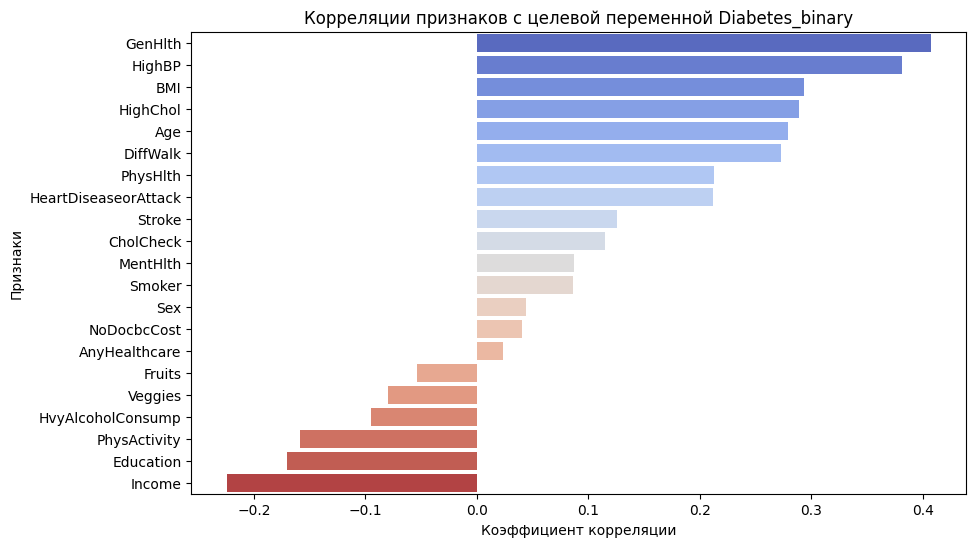

,Model,Accuracy,Precision,Recall
0,RandomForestClassifier,0.738966,0.740405,0.738966
1,SVM,0.749906,0.753569,0.749906
2,LogisticRegression,0.742361,0.742974,0.742361


Лучшая модель: SVM с метриками:
Accuracy     0.749906
Precision    0.753569
Recall       0.749906
Name: SVM, dtype: float64


In [5]:
def train_models(df, target_column, task='Regression'):
    """Обучение моделей для различных задач и вывод соответствующих метрик, а также визуализация корреляций с целевой переменной."""

    # Разделение на признаки и целевую переменную
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Вычисляем корреляцию между целевой переменной и остальными признаками
    if df[target_column].dtype != 'object':  # Проверяем, что целевая переменная числовая
        correlations = df.corr()[target_column].drop(target_column).sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=correlations.values, hue=correlations.index, y=correlations.index, palette='coolwarm')
        plt.title(f'Корреляции признаков с целевой переменной {target_column}')
        plt.xlabel('Коэффициент корреляции')
        plt.ylabel('Признаки')
        plt.show()

    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Список моделей в зависимости от задачи
    if task == 'Regression':
        models = {
            'RandomForestRegressor': RandomForestRegressor(),
            'SVR': SVR(),
            'LinearRegression': LinearRegression()
        }
        metric_functions = {
            'MSE': root_mean_squared_error,
            'MAE': mean_absolute_error,
            'R²': r2_score
        }
    elif task == 'Classification':
        models = {
            'RandomForestClassifier': RandomForestClassifier(),
            'SVM': SVC(),
            'LogisticRegression': LogisticRegression(dual=False)
        }
        metric_functions = {
            'Accuracy': accuracy_score,
            'Precision': lambda y_true, y_pred: classification_report(y_true, y_pred, zero_division=0.0, output_dict=True)['weighted avg']['precision'],
            'Recall': lambda y_true, y_pred: classification_report(y_true, y_pred, output_dict=True)['weighted avg']['recall']
        }
        import warnings
        warnings.filterwarnings('ignore')
    elif task == 'Clusterization':
        models = {
            'KMeans': KMeans(),
            'DBSCAN': DBSCAN(),
            'AgglomerativeClustering': AgglomerativeClustering()
        }
        metric_functions = {
            'Silhouette Score': silhouette_score
        }

    # DataFrame для хранения метрик
    metrics_df = pd.DataFrame(columns=['Model'] + list(metric_functions.keys()))

    # Обучение моделей и расчет метрик
    for name, model in models.items():
        if task == 'Clusterization':
            model.fit(X_train)
            if hasattr(model, 'labels_'):
                y_pred = model.labels_
            else:
                y_pred = model.predict(X_train)
            if len(set(y_pred)) <= 1:  # Проверяем наличие более одного кластера
                print(f"{name} не смог создать более одного кластера.")
                continue
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Вычисление всех метрик
        metrics = {'Model': name}
        for metric_name, metric_func in metric_functions.items():
            if task == 'Clusterization':
                if metric_name == 'Silhouette Score' and len(set(y_pred)) > 1:
                    metrics[metric_name] = metric_func(X_train, y_pred)
            else:
                metrics[metric_name] = metric_func(y_test, y_pred)

        # Добавление метрик в DataFrame
        metrics_df.loc[len(metrics_df)] = metrics

    # Вывод DataFrame с результатами
    display(metrics_df)

    # Анализ результатов обучения
    best_model = metrics_df.set_index('Model').mean(axis=1).idxmax()  # Модель с наилучшей средней метрикой
    best_metrics = metrics_df.set_index('Model').loc[best_model]
    print(f"Лучшая модель: {best_model} с метриками:\n{best_metrics}")


train_models(df,'Diabetes_binary', 'Classification')

На основании представленных метрик диагностики диабета, можно сделать следующие выводы:

### Общий анализ:
- **Accuracy**, **Precision** и **Recall** для всех трёх моделей находятся в диапазоне от 0.73 до 0.75. Это говорит о том, что модели в целом работают на уровне выше случайного угадывания, но могут быть улучшены.
- **SVM** показывает наилучшие результаты среди всех моделей по всем трём метрикам: `Accuracy = 0.7499`, `Precision = 0.7536`, и `Recall = 0.7499`. Это говорит о том, что SVM в текущем случае является лучшим классификатором для задачи диагностики диабета.

### Разбор метрик:
1. **Accuracy**:
   - `Accuracy` у всех моделей находится около 0.74-0.75, что означает, что 74-75% всех предсказаний верны. Это неплохой результат, но оставляет место для улучшений.
   
2. **Высокий Precision**:
   - Означает, что модель делает меньше ложноположительных ошибок (т.е. меньше случаев, когда она ошибочно классифицирует здоровых людей как больных диабетом).
   
3. **Высокий Recall**:
   - Означает, что модель лучше распознаёт больных диабетом (меньше случаев, когда она ошибочно классифицирует больных людей как здоровых).
   
**Можно попробовать улучшить результаты**:
   - **Настройка гиперпараметров**: Например, использовать сеточный поиск (GridSearch) или байесовскую оптимизацию для подбора параметров моделей.
   - **Улучшение данных**: Попробовать увеличить количество данных, сбалансировать классы (если они несбалансированы), провести дополнительную предобработку данных.
   - **Дополнительные модели**: Можно попробовать другие классификаторы, такие как градиентный бустинг (XGBoost, LightGBM), чтобы сравнить их с текущими результатами.

### Заключение:
SVM показывает наилучшие результаты для задачи классификации диабета в текущей постановке. Все модели работают на уровне около 0.74-0.75 по точности, что говорит о том, что модели хорошо обучены, но можно попробовать их улучшить с помощью настройки гиперпараметров и улучшения данных.